In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('heat_transfer_multilayer_dataset.csv')

In [4]:
material_columns = ['Mat1', 'Mat2', 'Mat3', 'Mat4', 'Mat5']
label_encoders = {}
for col in material_columns:
    df[col] = df[col].fillna('None')
    le = LabelEncoder()
    df[f'{col}_enc'] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
feature_columns = ['delta_T', 'L1', 'k1', 'L2', 'k2', 'L3', 'k3', 'L4', 'k4', 'L5', 'k5'] + [f'{col}_enc' for col in material_columns]
for col in feature_columns:
    df[col] = df[col].fillna(0)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

In [6]:
X = df_scaled[feature_columns]
y = df_scaled['Q']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 800 samples
Testing set: 200 samples


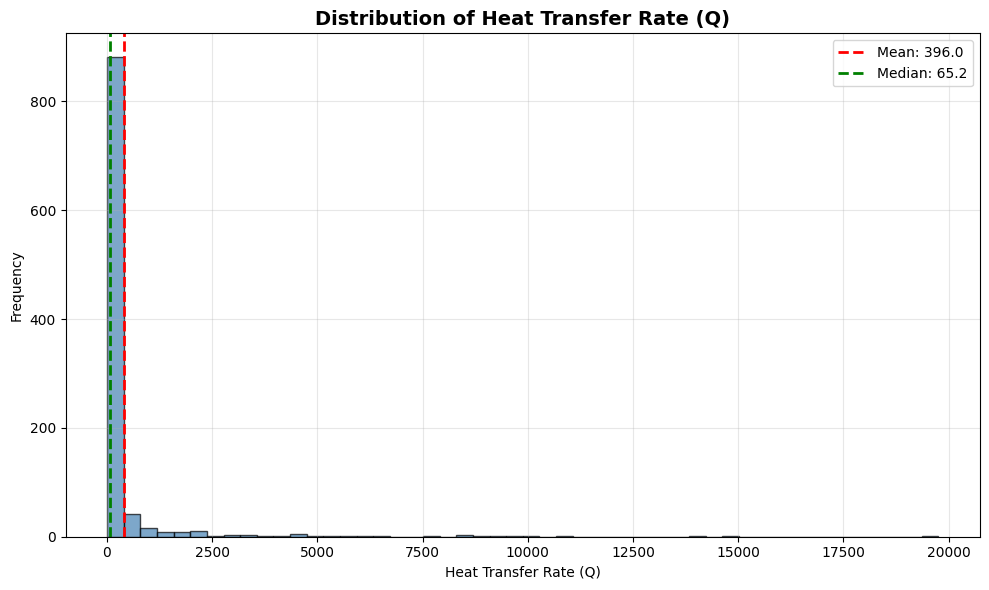

In [7]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.hist(df['Q'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_title('Distribution of Heat Transfer Rate (Q)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Heat Transfer Rate (Q)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)
q_mean = df['Q'].mean()
q_median = df['Q'].median()
ax1.axvline(q_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {q_mean:.1f}')
ax1.axvline(q_median, color='green', linestyle='--', linewidth=2, label=f'Median: {q_median:.1f}')
ax1.legend()
plt.tight_layout()
plt.show()

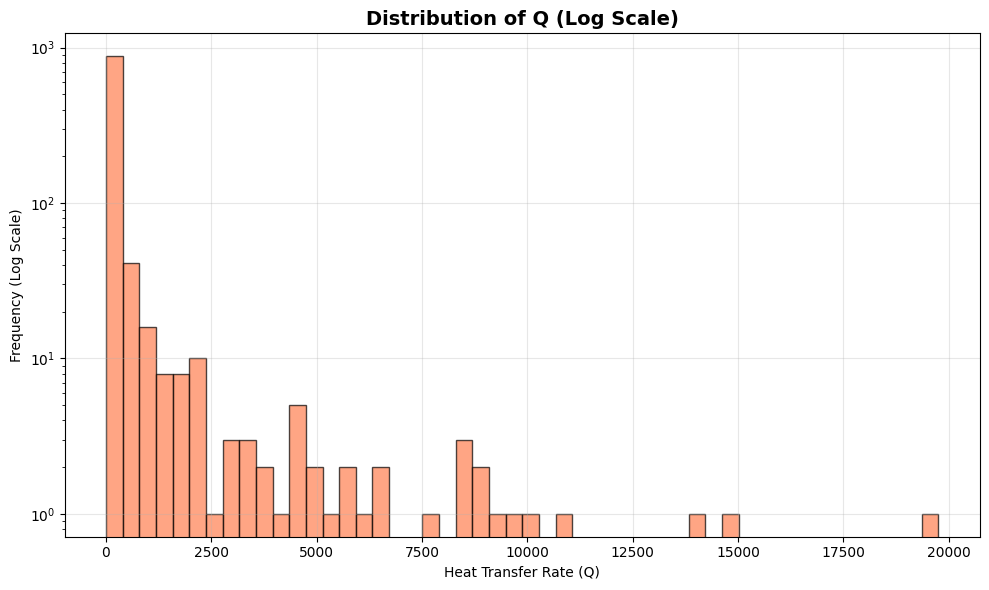

In [8]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.hist(df['Q'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax2.set_yscale('log')
ax2.set_title('Distribution of Q (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Heat Transfer Rate (Q)')
ax2.set_ylabel('Frequency (Log Scale)')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

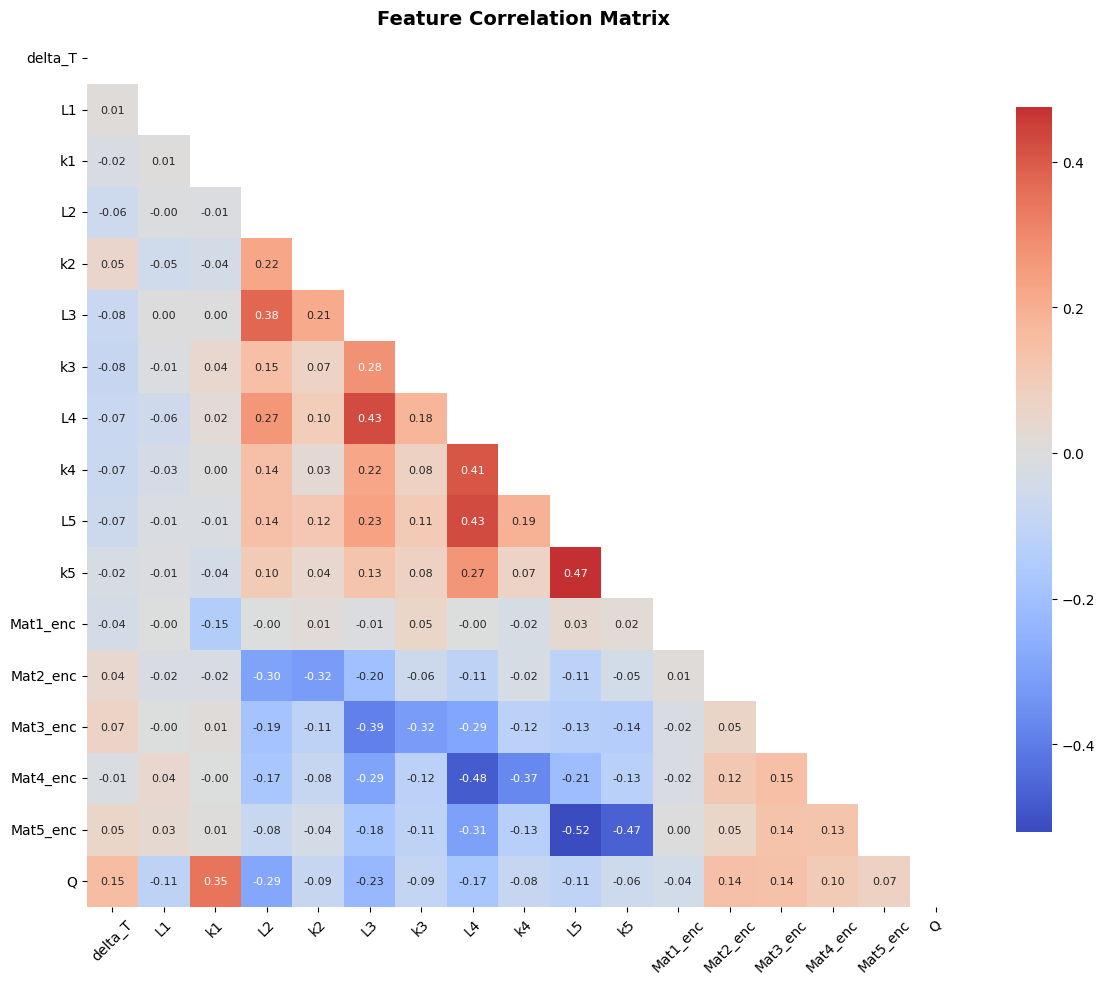

In [9]:
fig3, ax3 = plt.subplots(figsize=(12, 10))
correlation_data = df_scaled[feature_columns + ['Q']].corr()
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            ax=ax3,
            cbar_kws={"shrink": .8},
            annot_kws={'size': 8})
ax3.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

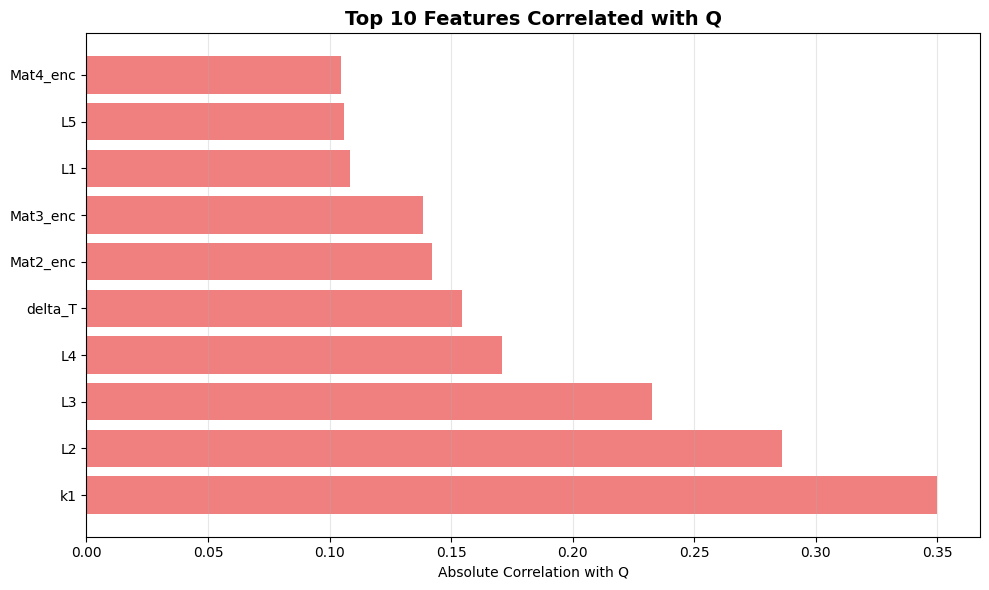

In [10]:
fig4, ax4 = plt.subplots(figsize=(10, 6))
q_correlations = correlation_data['Q'].abs().sort_values(ascending=False)[1:]
top_features = q_correlations.head(10)
ax4.barh(range(len(top_features)), top_features.values, color='lightcoral')
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features.index)
ax4.set_xlabel('Absolute Correlation with Q')
ax4.set_title('Top 10 Features Correlated with Q', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [11]:
print(f"\nDataset Summary:")
print(f"Total samples: {len(df):,}")
print(f"Features: {len(feature_columns)}")
print(f"\nQ Statistics:")
print(f"Min: {df['Q'].min():.2f}")
print(f"Max: {df['Q'].max():.2f}")
print(f"Mean: {df['Q'].mean():.2f}")
print(f"Median: {df['Q'].median():.2f}")
print(f"Std: {df['Q'].std():.2f}")
print(f"Skewness: {df['Q'].skew():.2f}")

print(f"\nTop 5 features most correlated with Q:")
for feature, corr in q_correlations.head(5).items():
    print(f"{feature}: {corr:.3f}")


Dataset Summary:
Total samples: 1,000
Features: 16

Q Statistics:
Min: 7.47
Max: 19758.04
Mean: 395.98
Median: 65.15
Std: 1445.47
Skewness: 7.14

Top 5 features most correlated with Q:
k1: 0.350
L2: 0.286
L3: 0.233
L4: 0.171
delta_T: 0.154


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

trained_models = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    trained_models[name] = model
    predictions[name] = {
        'train_pred': y_pred_train,
        'test_pred': y_pred_test
    }

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('heat_transfer_multilayer_dataset.csv')
target = "Q"
features = None
TEST_SIZE = 0.2
RANDOM_STATE = 42
save_pred_csv = True

df = pd.read_csv('heat_transfer_multilayer_dataset.csv')
print("Data Shape: ", df.shape)
print("Columns: ", df.columns.tolist())

if target not in df.columns:
  raise ValueError(f"Target columns '{target}' is not found in the dataset.")


if features is None:
  numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
  feature_columns = [c for c in numeric_columns if c != target]
  print("Auto Selected numeric feature columns:", feature_columns)

else:
  feature_columns = features
  missing = [c for c in feature_columns if c != target]
  if missing:
    raise ValueError(f"Missing feature columns: {missing}")

X = df[feature_columns].copy()
y = df[target].copy()

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=TEST_SIZE, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models ={
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE, verbosity=0),
    "Neural Network (MLP)": MLPRegressor(random_state=RANDOM_STATE, max_iter=500)}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({"model": name, "MSE": mse, "MAE": mae, "R²": r2, "RMSE": rmse})
    print(f"{name} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}")


results_df=pd.DataFrame(results).set_index("model")
print("\n---Summary---")
print(results_df.sort_values("RMSE"))

results_df.to_csv("models_performance_summary.csv")
print("\nSaved Performance Summary to models_performance_summary.csv")

Data Shape:  (1000, 17)
Columns:  ['delta_T', 'Mat1', 'L1', 'k1', 'Mat2', 'L2', 'k2', 'Mat3', 'L3', 'k3', 'Mat4', 'L4', 'k4', 'Mat5', 'L5', 'k5', 'Q']
Auto Selected numeric feature columns: ['delta_T', 'L1', 'k1', 'L2', 'k2', 'L3', 'k3', 'L4', 'k4', 'L5', 'k5']
Linear Regression -> MSE: 1227420.8949, MAE: 562.1715, R²: 0.1963, RMSE: 1107.8903
Decision Tree -> MSE: 465909.5189, MAE: 163.1172, R²: 0.6949, RMSE: 682.5757
Random Forest -> MSE: 259879.1074, MAE: 142.2110, R²: 0.8298, RMSE: 509.7834
XGBoost -> MSE: 232190.4839, MAE: 124.1431, R²: 0.8480, RMSE: 481.8615
Neural Network (MLP) -> MSE: 1167751.7062, MAE: 480.0311, R²: 0.2354, RMSE: 1080.6256

---Summary---
                               MSE         MAE        R²         RMSE
model                                                                
XGBoost               2.321905e+05  124.143094  0.847969   481.861478
Random Forest         2.598791e+05  142.211007  0.829839   509.783393
Decision Tree         4.659095e+05  163.117250  0

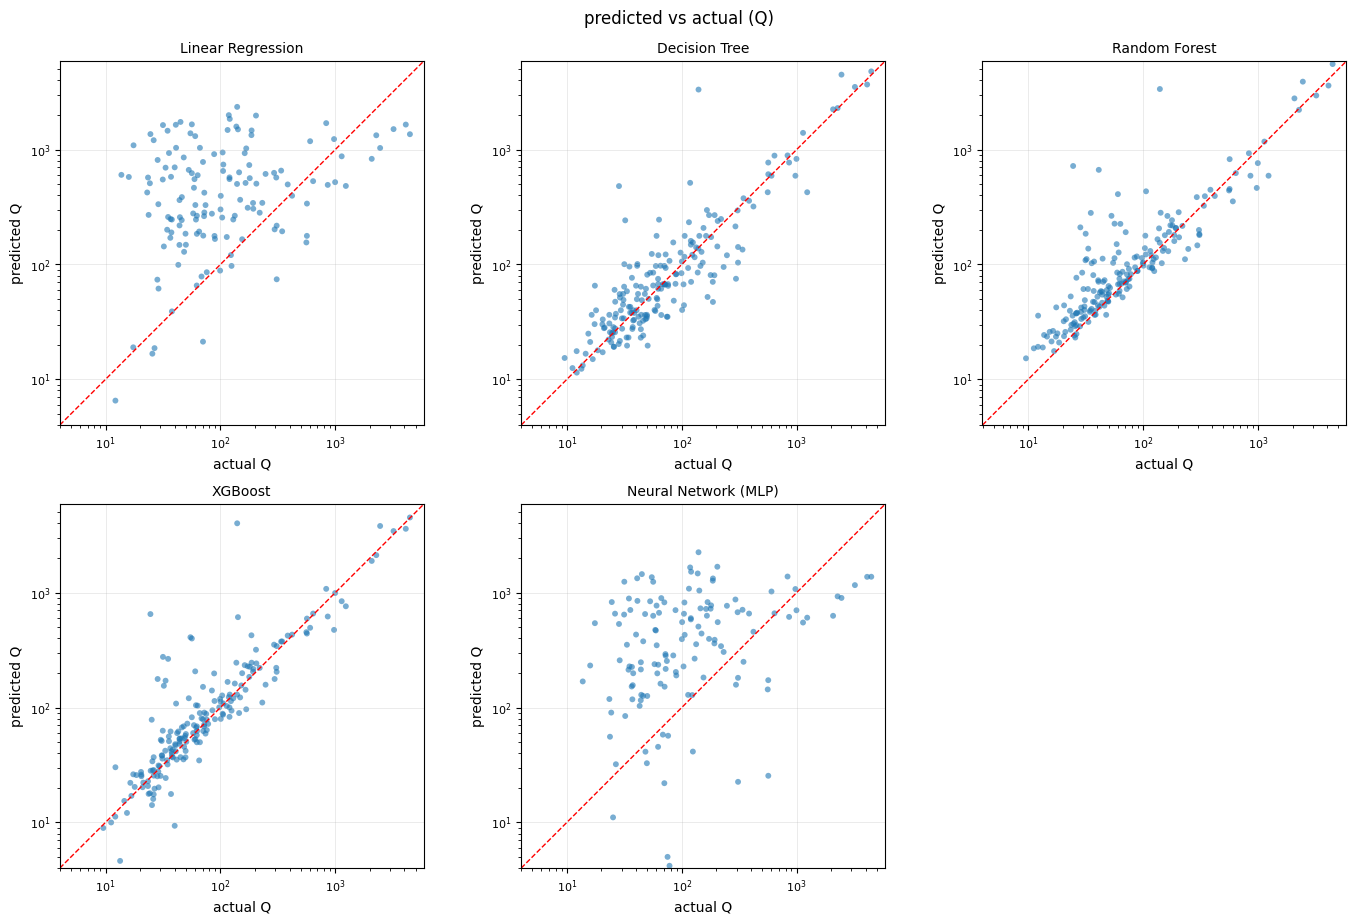

In [14]:
preds={}
for name,model in models.items():
    try:
        preds[name]=model.predict(X_test)
    except Exception as e:
        print(f'skipping {name}: {e}')

items=list(preds.items())
n=min(len(items),5)

y_true = y_test.values if hasattr(y_test,'values') else y_test
all_preds=np.concatenate([p for _,p in items])
y_all=np.concatenate([y_true,all_preds])
y_pos=y_all[y_all>0]
if y_pos.size==0:
    raise ValueError("no positive values for log scale; disable log or filter data.")
lo,hi=np.percentile(y_pos,[1,99])
lo=max(lo,1e-12)
hi=max(hi,lo*10)
def style(ax):
    ax.tick_params(axis='both',labelsize=8)
    ax.title.set_fontsize(10)
def clean_grid(fig,axes,n):
    for j in range(n,6):
        try: axes[j].remove()
        except: pass
    fig.tight_layout(pad=1.0)
n=min(len(items),5)
fig,axes=plt.subplots(2,3,figsize=(14,9)); axes=axes.ravel()
for i,(name,y_pred) in enumerate(items[:n]):
    ax=axes[i]
    m=(y_true>0)&(y_pred>0)
    yt=y_true[m]; yp=y_pred[m]
    if yt.size==0:
        ax.set_title(f'{name} (no positive data for log)'); style(ax); continue
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.scatter(yt,yp,alpha=0.6,s=18,edgecolor='none')
    ax.plot([lo,hi],[lo,hi],color='r',linestyle='--',linewidth=1)
    ax.set_aspect('equal',adjustable='box')
    ax.set(xlabel='actual Q',ylabel='predicted Q',xlim=(lo,hi),ylim=(lo,hi))
    ax.grid(True,alpha=0.25,linewidth=0.7)
    ax.set_title(name); style(ax)
clean_grid(fig,axes,n)
plt.suptitle('predicted vs actual (Q)',fontsize=12,y=1.02)
plt.show()

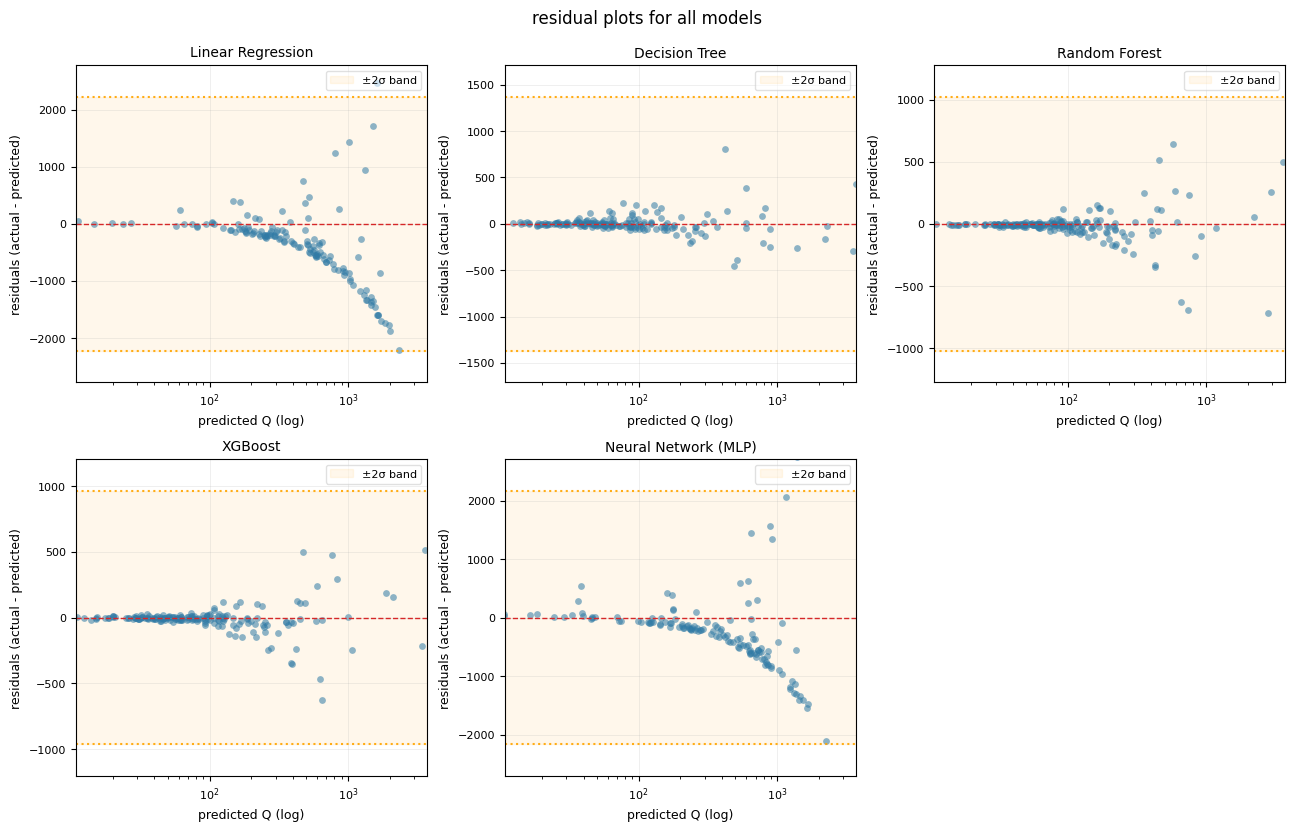

In [15]:
use_log_x=True
marker_kw=dict(s=24,alpha=0.55,linewidths=0,marker='o')
all_preds=np.concatenate([p for _,p in items[:n]])
if use_log_x:
    pos=all_preds[all_preds>0]
    xlo,xhi=np.percentile(pos,[2,98])
    xlo=max(xlo,1e-12); xhi=max(xhi,xlo*10)
else:
    xlo,xhi=np.percentile(all_preds,[1,99])
fig,axes=plt.subplots(2,3,figsize=(13,8)); axes=axes.ravel()
for i,(name,y_pred) in enumerate(items[:n]):
    ax=axes[i]
    res=y_true - y_pred
    rs=np.std(res,ddof=1)
    if use_log_x:
        m=y_pred>0
        xp, rp = y_pred[m], res[m]
        ax.set_xscale('log')
    else:
        xp, rp = y_pred, res
    r98=np.percentile(np.abs(rp),98)
    rlim=min(max(r98,1e-9),2.5*rs)
    jx=(np.random.rand(xp.size)-0.5)*0.01*(xhi-xlo)
    ax.scatter(xp+jx, rp, **marker_kw)
    ax.axhline(0,color='#d62728',linestyle='--',linewidth=1)
    ax.axhspan(-2*rs,2*rs,color='orange',alpha=0.08,label='±2σ band')
    ax.axhline(2*rs,color='orange',linestyle=':',alpha=0.9)
    ax.axhline(-2*rs,color='orange',linestyle=':',alpha=0.9)
    ax.set_xlim(xlo,xhi); ax.set_ylim(-rlim,rlim)
    ax.grid(True,alpha=0.2,linewidth=0.7)
    ax.set_xlabel('predicted Q'+(' (log)' if use_log_x else ''),fontsize=9)
    ax.set_ylabel('residuals (actual - predicted)',fontsize=9)
    ax.set_title(name,fontsize=10)
    ax.tick_params(labelsize=8)
    ax.legend(fontsize=8,loc='upper right',framealpha=0.6)
for j in range(n,6):
    try: axes[j].remove()
    except: pass
plt.tight_layout(pad=0.9)
plt.suptitle('residual plots for all models',fontsize=12,y=1.03)
plt.show()

In [16]:
feature_columns = [
    'delta_T', 'L1', 'k1',
    'L2', 'k2', 'L3', 'k3',
    'L4', 'k4', 'L5', 'k5'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[feature_columns])

from xgboost import XGBRegressor
best_model = XGBRegressor()
best_model.fit(scaler.transform(df[feature_columns]), df['Q'])

import joblib
joblib.dump((scaler, best_model, feature_columns), "xgb_11feature_pipeline.pkl")

def prompt_numeric(msg):
    while True:
        s = input(msg).strip()
        try:
            return float(s)
        except ValueError:
            print("Enter a numeric value")

def collect_user_features():
    vals = {}
    print("Enter values:")
    for f in feature_columns:
        s = input(f"{f}: ").strip()
        if s == "":
            vals[f] = df[f].mean()
        else:
            try:
                vals[f] = float(s)
            except ValueError:
                vals[f] = prompt_numeric(f"{f}: ")
    return vals

def predict_q_xgb_interactive():
    user_vals = collect_user_features()
    x = pd.DataFrame([[user_vals[f] for f in feature_columns]], columns=feature_columns)
    x_scaled = scaler.transform(x)
    q_pred = float(best_model.predict(x_scaled)[0])
    return q_pred, user_vals

In [33]:
0q_hat, inputs_given = predict_q_xgb_interactive()
print("\ninputs used:", inputs_given)
print("predicted Q:", q_hat)

Enter values:
delta_T: 287.0722
L1: 0.02
k1: 0.045
L2: 0.047
k2: 0.045
L3: 0.074
k3: .04
L4: 0.097
k4: 0.8
L5: 0.046
k5: 0.045
N: NaN
L_total: NaN
R_series: NaN
k_avg: NaN
L_min: NaN

inputs used: {'delta_T': 287.0722, 'L1': 0.02, 'k1': 0.045, 'L2': 0.047, 'k2': 0.045, 'L3': 0.074, 'k3': 0.04, 'L4': 0.097, 'k4': 0.8, 'L5': 0.046, 'k5': 0.045, 'N': nan, 'L_total': nan, 'R_series': nan, 'k_avg': nan, 'L_min': nan}
predicted Q: 109.52452087402344


In [21]:
%pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 4.4 MB/s eta 0:00:00


In [22]:
import pygad
import warnings
warnings.filterwarnings('ignore')
if 'XGBoost' in trained_models:
    best_model = trained_models['XGBoost']
    best_model_name = 'XGBoost'
elif 'Random Forest' in trained_models:
    best_model = trained_models['Random Forest']
    best_model_name = 'Random Forest'
else:
    best_model = trained_models[list(trained_models.keys())[0]]
    best_model_name = list(trained_models.keys())[0]

layer_count_min, layer_count_max = 1, 5
delta_T_bounds = (1.0, 100.0)
L_bounds      = (1e-4, 0.05)
k_bounds      = (0.01, 400.0)
gene_space = [
    {'low': layer_count_min, 'high': layer_count_max, 'step': 1},
    {'low': delta_T_bounds[0], 'high': delta_T_bounds[1]},
]
for _ in range(5):
    gene_space.append({'low': L_bounds[0], 'high': L_bounds[1]})
    gene_space.append({'low': k_bounds[0], 'high': k_bounds[1]})

In [23]:
def genome_to_features(solution):
    delta_T = solution[1]
    Ls = []
    ks = []
    for li in range(5):
        L_idx = 2 + li*2
        k_idx = 3 + li*2
        Ls.append(solution[L_idx])
        ks.append(solution[k_idx])
    feature_vector = [delta_T]
    for li in range(5):
        feature_vector.append(Ls[li])
        feature_vector.append(ks[li])
    return np.array(feature_vector, dtype=float).reshape(1, -1)

In [24]:
def fitness_func(ga_instance, solution, solution_idx):
    solution = repair_solution(solution.copy())
    X_row = genome_to_features(solution)
    X_scaled = scaler.transform(X_row)
    y_pred = best_model.predict(X_scaled)
    Q_pred = float(y_pred[0])
    total_thickness = sum(solution[2 + 2*i] for i in range(5))
    penalty = 0.0
    if total_thickness < 0.0002:
        penalty += 1000.0
    return -(Q_pred + penalty)

In [25]:
best_tracking = {'gens': [], 'best_fitness': [], 'best_solution': None, 'best_Q': None}
def on_generation(ga_instance):
    gen = ga_instance.generations_completed
    best_fitness = ga_instance.best_solution()[1]
    best_solution = repair_solution(ga_instance.best_solution()[0].copy())
    X_row = genome_to_features(best_solution)
    X_scaled = scaler.transform(X_row)
    Q_pred = float(best_model.predict(X_scaled)[0])
    best_tracking['gens'].append(gen)
    best_tracking['best_fitness'].append(best_fitness)
    best_tracking['best_solution'] = best_solution
    best_tracking['best_Q'] = Q_pred
    if gen % 10 == 0 or gen == 1:
        print(f"Gen {gen}: best_fitness={best_fitness:.4f}, best_Q={Q_pred:.4f}, n_layers={int(best_solution[0])}")

feature_columns = [
    'delta_T', 'L1', 'k1',
    'L2', 'k2', 'L3', 'k3',
    'L4', 'k4', 'L5', 'k5',
    'N', 'L_total', 'R_series', 'k_avg', 'L_min'
]

def genome_to_features(solution):
    n_layers = int(round(solution[0]))
    delta_T = float(solution[1])
    Ls = [float(solution[2 + 2*i]) for i in range(5)]
    ks = [float(solution[3 + 2*i]) for i in range(5)]
    L_total = sum(Ls)
    R_series = sum((L / k) if k > 0 else 0.0 for L, k in zip(Ls, ks))
    k_avg = float(np.mean(ks))
    L_min = float(np.min(Ls))
    mapping = {
        'delta_T': delta_T,
        'L1': Ls[0], 'k1': ks[0],
        'L2': Ls[1], 'k2': ks[1],
        'L3': Ls[2], 'k3': ks[2],
        'L4': Ls[3], 'k4': ks[3],
        'L5': Ls[4], 'k5': ks[4],
        'N': n_layers,
        'L_total': L_total,
        'R_series': R_series,
        'k_avg': k_avg,
        'L_min': L_min
    }
    row = [mapping[col] for col in feature_columns]
    return np.array(row, dtype=float).reshape(1, -1)

In [26]:
def compute_engineered_features(frame):
    Ls = [f'L{i}' for i in range(1,6)]
    ks = [f'k{i}' for i in range(1,6)]
    frame['L_total'] = frame[Ls].sum(axis=1)
    frame['R_series'] = sum(frame[Ls[i]] / frame[ks[i]].replace(0, np.nan) for i in range(5))
    frame['R_series'] = frame['R_series'].fillna(0.0)
    frame['k_avg'] = frame[ks].mean(axis=1)
    frame['L_min'] = frame[Ls].min(axis=1)
    frame['N'] = (frame[Ls] > 0).sum(axis=1).astype(int)
    return frame
df_fe = compute_engineered_features(df.copy())
feature_columns = [
    'delta_T', 'L1', 'k1',
    'L2', 'k2', 'L3', 'k3',
    'L4', 'k4', 'L5', 'k5',
    'N', 'L_total', 'R_series', 'k_avg', 'L_min'
]
X_train_full = df_fe[feature_columns].to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_full)

StandardScaler()

In [27]:
delta_T_fixed = df['delta_T'].median()

L_all = pd.concat([df[f'L{i}'] for i in range(1, 6)])
k_all = pd.concat([df[f'k{i}'] for i in range(1, 6)])

L_bounds = (float(L_all.quantile(0.05)), float(L_all.quantile(0.95)))
k_bounds = (float(k_all.quantile(0.05)), float(k_all.quantile(0.95)))

print(f"Bounds: L {L_bounds}   k {k_bounds}")

def repair_solution(sol):
    N = int(round(sol[0]))
    N = max(1, min(5, N))
    sol[0] = N
    for i in range(5):
        L_idx, k_idx = 1 + 2*i, 2 + 2*i
        sol[L_idx] = float(np.clip(sol[L_idx], *L_bounds))
        sol[k_idx] = float(np.clip(sol[k_idx], *k_bounds))
        if i >= N:
            sol[L_idx] = 0.0
    return sol

def genome_to_features(sol):
    N = int(sol[0])
    Ls = [sol[1 + 2*i] for i in range(5)]
    ks = [sol[2 + 2*i] for i in range(5)]
    L_total = sum(Ls)
    R_series = sum(L/k if k > 0 else 0 for L, k in zip(Ls, ks))
    k_avg = np.mean(ks)
    L_min = min([L for L in Ls if L > 0]) if any(Ls) else 0

    mapping = {
        'delta_T': delta_T_fixed,
        'L1': Ls[0], 'k1': ks[0],
        'L2': Ls[1], 'k2': ks[1],
        'L3': Ls[2], 'k3': ks[2],
        'L4': Ls[3], 'k4': ks[3],
        'L5': Ls[4], 'k5': ks[4],
        'N': N,
        'L_total': L_total,
        'R_series': R_series,
        'k_avg': k_avg,
        'L_min': L_min
    }

    return np.array([mapping[col] for col in feature_columns]).reshape(1, -1)


from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler()
y_scaler.fit(df[['Q']])

def fitness_func(ga, sol, idx):
    sol = repair_solution(sol.copy())
    X_row = genome_to_features(sol)
    X_scaled = scaler.transform(X_row)
    Q_scaled = best_model.predict(X_scaled)[0]
    Q_raw = y_scaler.inverse_transform([[Q_scaled]])[0,0]
    penalty = 1000 if (X_row[0][feature_columns.index('R_series')] < 0.001) else 0
    return -(Q_raw + penalty)

Bounds: L (0.014, 0.096)   k (0.025, 1.4)


In [35]:
def fitness_func(ga_instance, solution, solution_idx):
  import pygad
import numpy as np


delta_T = 100
k_values = np.array([0.04, 0.05, 0.06, 0.045, 0.055, 0.05, 0.048, 0.052, 0.047, 0.049, 0.051])

def heat_loss(L_values):
    R_total = np.sum(L_values / k_values)
    return delta_T / R_total

def fitness_func(ga_instance, solution, solution_idx):
    Q = heat_loss(solution)
    return -Q
num_genes = 11

ga_instance = pygad.GA(
    num_generations=50,
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=num_genes,
    init_range_low=0.01,
    init_range_high=0.2,
    mutation_percent_genes=20,
    mutation_type="random",
    mutation_by_replacement=True,
    crossover_type="single_point"
)

ga_instance.run()

best_solution, best_fitness, _ = ga_instance.best_solution()
best_Q = heat_loss(best_solution)

print("Optimized thicknesses:", best_solution)
print("Minimum Heat Loss (After Optimization):", best_Q)

L_initial = np.full(num_genes, 0.1)
Q_initial = heat_loss(L_initial)
print("Heat Loss (Before Optimization):", Q_initial)

Optimized thicknesses: [-0.87298442 -0.07210375 -0.04751336  0.04671179  0.57674075  0.18432389
  0.02329184  0.86737013  0.10705987  0.17721434 -0.72588151]
Minimum Heat Loss (After Optimization): -4784.1649278181485
Heat Loss (Before Optimization): 4.47572655487536


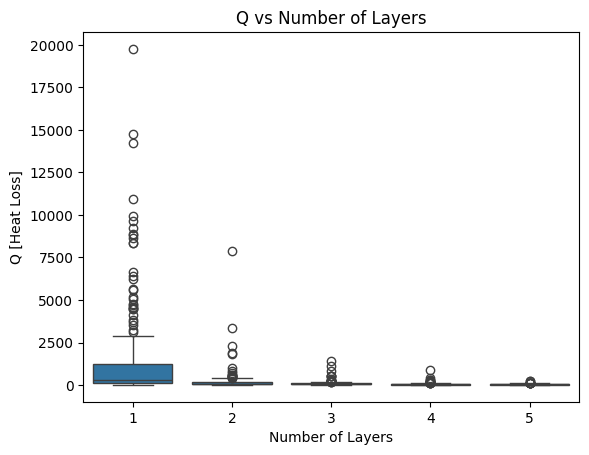

In [29]:
df["num_layers"] = df[["L1","L2","L3","L4","L5"]].notnull().sum(axis=1)

sns.boxplot(x='num_layers', y='Q', data = df)
plt.title("Q vs Number of Layers")
plt.xlabel("Number of Layers")
plt.ylabel("Q [Heat Loss]")
plt.show()

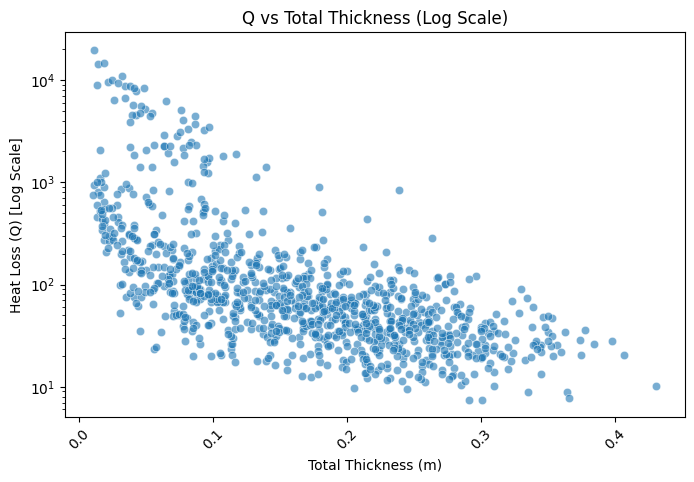

In [30]:
df["total_thickness"] = df[["L1", "L2", "L3", "L4", "L5"]].sum(axis=1)

plt.figure(figsize=(8,5))
sns.scatterplot(x="total_thickness", y="Q", data=df, alpha=0.6)

plt.yscale("log")
plt.title("Q vs Total Thickness (Log Scale)")
plt.xlabel("Total Thickness (m)")
plt.ylabel("Heat Loss (Q) [Log Scale]")

plt.xticks(rotation=45)
plt.show()

Material
Air                   49.072363
Fiberglass            59.804271
Polyurethane Foam     60.661520
Mineral Wool          70.314342
Ceramic Fiber         95.522015
Wood                 114.845182
Glass                499.130273
Concrete             526.540533
Name: Q, dtype: float64


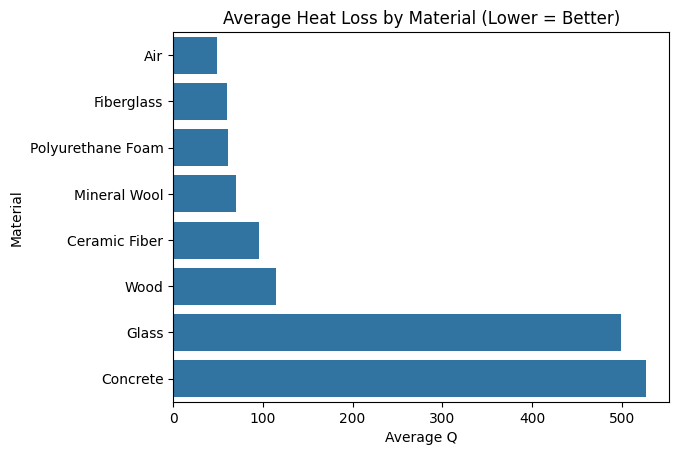

In [31]:
all_materials = pd.concat([
    df[["Mat1","Q"]].rename(columns={"Mat1":"Material"}),
    df[["Mat2","Q"]].rename(columns={"Mat2":"Material"}),
    df[["Mat3","Q"]].rename(columns={"Mat3":"Material"}),
    df[["Mat4","Q"]].rename(columns={"Mat4":"Material"}),
    df[["Mat5","Q"]].rename(columns={"Mat5":"Material"})
])

all_materials = all_materials.dropna()

material_ranking = all_materials.groupby("Material")["Q"].mean().sort_values()
print(material_ranking)

sns.barplot(x=material_ranking.values, y=material_ranking.index)
plt.title("Average Heat Loss by Material (Lower = Better)")
plt.xlabel("Average Q")
plt.ylabel("Material")
plt.show()

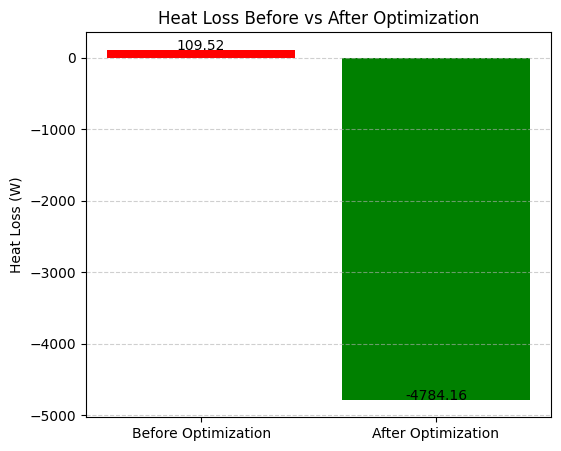

In [36]:
heat_loss_before = q_hat
heat_loss_after = best_Q

labels = ['Before Optimization', 'After Optimization']
values = [heat_loss_before, heat_loss_after]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.2f}", ha='center', fontsize=10)

plt.ylabel('Heat Loss (W)')
plt.title('Heat Loss Before vs After Optimization')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()